# TODO
- Search data
- Find data
- Import it
- Explore (find column names, data types, shape,size, column type, description of column, 
supervised(regression/ classification) or unsupervised)
- Find issues if exists (check null, duplicates,)
- handle issues
- Find the relationship between attributes from the data.
- 

In [19]:
%matplotlib inline


## ✅ Step 1: Load & Explore the Dataset
### 1.1 Load the Data

In [1]:
# import
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('../data/happiness-data.csv')

# Display first few rows
data.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


🔹 Why? This allows us to preview the data and check for any immediate inconsistencies.

### 1.2 Check Data Structure

#### Why?

- Helps identify data types (e.g., object, int, float).
- Allows us to detect missing values early.
- Provides summary statistics like mean, min, max of numerical features.

In [3]:
# Number of rows & columns
data.shape

(153, 12)

In [4]:
# Check data types of column
data.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [5]:
# List of column names
data.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

In [6]:
# Check column names, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


In [7]:
# Summary statistics of numerical columns
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,151.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,68.950000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


## ✅ Step 2: Data Cleaning & Preprocessing

### 2.1 Handle Missing Values

In [8]:
data.isnull() # Check for missing values

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()  # Count missing values in each column

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

📌 If we find missing values, we handle them appropriately:

- Numerical columns (e.g., Job Satisfaction, Economy, Health) → Fill with median
- Categorical columns (e.g., Country, Region) → Fill with mode

🔹 Why? This ensures no missing values interfere with analysis.

In [10]:
# see the null values in the row
data[data.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
59,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
144,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [11]:
# Handle missing value in job satisfaction
# As, Job satisfaction is numeric value. Fill the value with median
data['Job Satisfaction'].fillna(data['Job Satisfaction'].median(), inplace=True)


/tmp/ipykernel_21760/2218314041.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Job Satisfaction'].fillna(data['Job Satisfaction'].median(), inplace=True)


In [12]:
# check missing values with count after setting the value
data.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

### 2.2 Handling Duplicates
🔹 Why? Avoids bias in insights due to repeated entries.

In [13]:
# Count duplicate rows
data.duplicated().sum()

0

In [14]:
# Drop duplicate rows; Since we do not have any duplicate rows, we will not drop any rows
# df.drop_duplicates(inplace=True)  # Remove duplicates

## ✅ Step 3: Exploratory Data Analysis (EDA)

### 3.1 Generate Automated Data Report
🔹 Why? This provides an automated overview of distributions, correlations, and missing values.

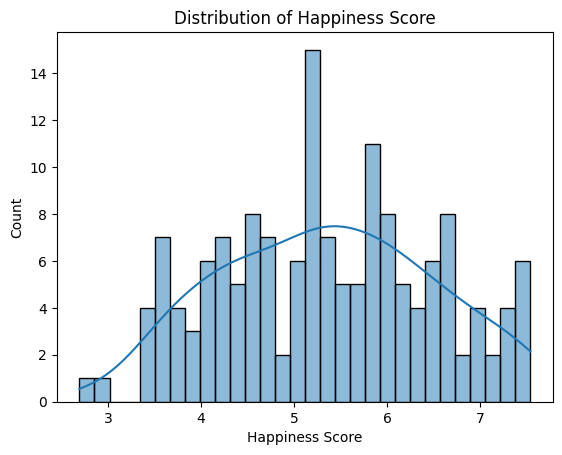

In [15]:
import seaborn as sns  
import matplotlib.pyplot as plt  

sns.histplot(data['Happiness Score'], bins=30, kde=True)  
plt.title("Distribution of Happiness Score")  
plt.show()


🔹 Insight? Determines if happiness scores are normally distributed or skewed.

### 3.3 Identifying Outliers
🔹 Insight? Helps detect outliers in the Happiness Score.

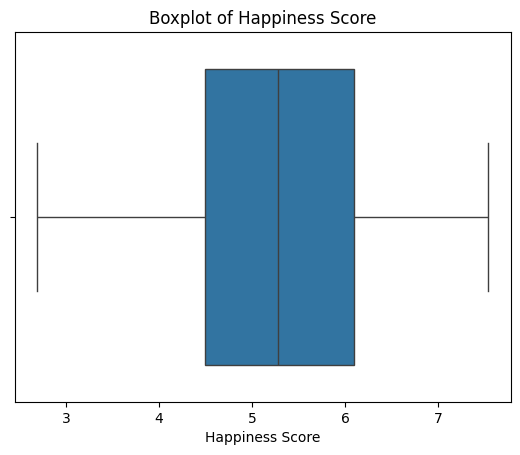

In [16]:
sns.boxplot(x=data['Happiness Score'])
plt.title("Boxplot of Happiness Score")
plt.show()

### 3.4 Correlation Analysis
 Insight?

- Identifies strongly correlated variables.
- Checks if Economy, Family, Health are major contributors to happiness.

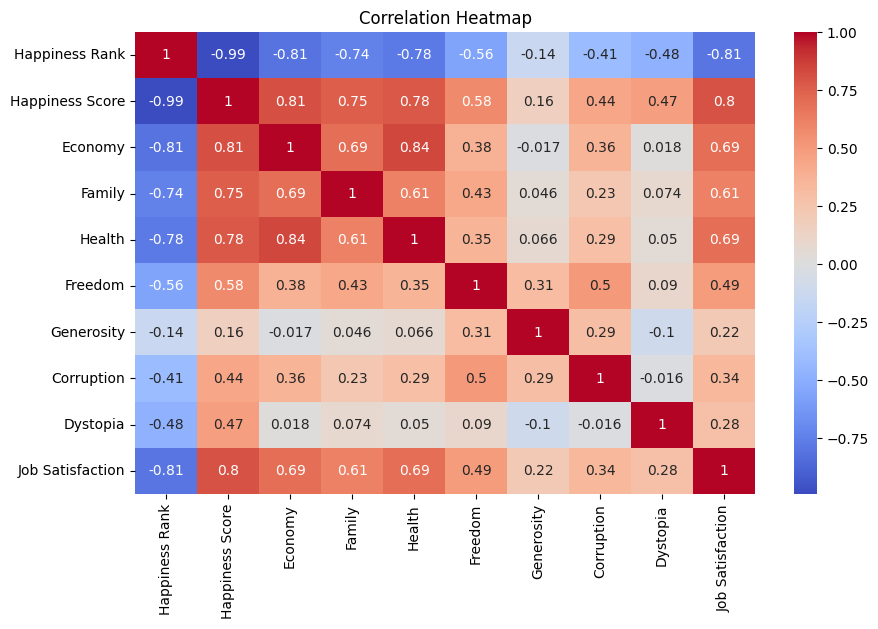

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_df = data.select_dtypes(include=["number"])

# Compute and visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


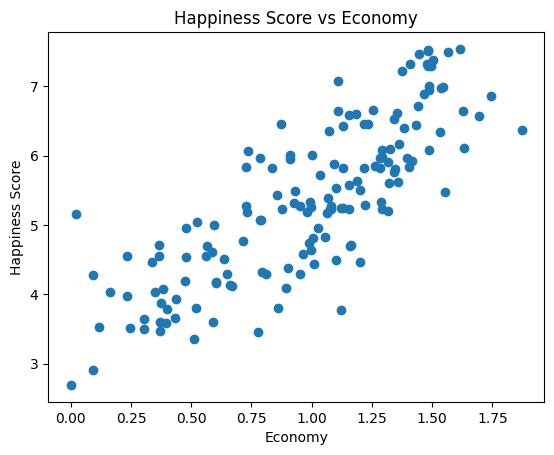

In [18]:
# visualize happiness score and economy
plt.scatter(data['Economy'], data['Happiness Score'])
plt.xlabel('Economy')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Economy')
plt.show()